In [645]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [851]:
# LOG_FOLDER = 'logs/1745945132/' # + new data + geo augs + 1/100 Dino
# LOG_FOLDER = 'logs/1745942032/' # + new data + geo augs + 1/10 Dino
# LOG_FOLDER = 'logs/1745914896/' # + new data + geo augs + 1/100 Dino + DPT + DA weights
# LOG_FOLDER = 'logs/1745911312/' # + new data + geo augs + 1/100 Dino
# LOG_FOLDER = 'logs/1745908650/' # + new data + geo augs + frozen Dino
# LOG_FOLDER = 'logs/1745906675/' # + new data + geo augs + dpt + frozen Dino
# LOG_FOLDER = 'logs/1745903494' # + new data
# LOG_FOLDER = 'logs/1745900388/' # + new data
# LOG_FOLDER = 'logs/1745898572/' # weight class
# LOG_FOLDER = 'logs/1745893964/' # baseline
# LOG_FOLDER = 'logs/1745897426' # weight 0.025
# LOG_FOLDER = 'logs/1745895248/' # weight 0.1
# LOG_FOLDER = 'logs/1745890142/'
# LOG_FOLDER = 'logs/1745887855/'
# LOG_FOLDER = 'logs/1745888237/'
# LOG_FOLDER = 'logs/1745887855/'
# LOG_FOLDER = 'logs/1745886740/'

# LOG_FOLDER = 'logs/1745884764/'
# LOG_FOLDER = 'logs/1745876181/'
LOG_FOLDERS = [
    'logs/1745898572/', # weight class
    'logs/1745893964/', # baseline
    'logs/1745897426', # weight 0.025
    'logs/1745895248/', # weight 0.1
]

LOG_FOLDERS = [
    'logs/1745900388/', # weight 0.1 + new data
    'logs/1745895248/', # weight 0.1
    'logs/1745905322/', # weight 0.1 + new data + geo augs + photo augs
    'logs/1745903494/', # weight 0.1 + new data + geo augs
]

# LOG_FOLDERS = [
#     'logs/1745903494/', # + new data + geo augs
#     'logs/1745942032/', # + new data + geo augs + 1/10 Dino
#     'logs/1745908650/', # + new data + geo augs + frozen Dino
#     'logs/1745911312/', # + new data + geo augs + 1/100 Dino
# ]

LOG_FOLDERS = [
    'logs/1745914896/', # Simple + DinoV2 Weights
    'logs/1745954197/', # DPT + DinoV2 Weights
    'logs/1745963104/', # DPT + DepthAnything Weights
]

for LOG_FOLDER in LOG_FOLDERS:
    train_metrics = pickle.load(open(os.path.join(LOG_FOLDER, 'train_metrics.pkl'), 'rb'))
    val_metrics = pickle.load(open(os.path.join(LOG_FOLDER, 'val_metrics.pkl'), 'rb'))
    test_metrics = pickle.load(open(os.path.join(LOG_FOLDER, 'test_metrics.pkl'), 'rb'))

    def process_metrics(metrics):
        ious, losses = metrics
        ious = np.array(ious)[:, 1:]
        mious = np.mean(ious, axis=1)
        return mious, losses, ious

    train_metrics = process_metrics(train_metrics)
    val_metrics = process_metrics(val_metrics)
    test_metrics = process_metrics(test_metrics)
    idx = np.argmax(val_metrics[0])
    config = json.load(open(os.path.join(LOG_FOLDER, 'config.json')))
    print("Train mIOU:", train_metrics[0][idx], "Val mIOU", val_metrics[0][idx], "Weight:", config['weight'], "2012", config['add_2012'])

Train mIOU: 0.7736425549955739 Val mIOU 0.6170221098705923 Weight: 0.1 2012 True
Train mIOU: 0.7703199412836418 Val mIOU 0.6439183911863656 Weight: 0.1 2012 True
Train mIOU: 0.7554006791216044 Val mIOU 0.6263178078128271 Weight: 0.1 2012 True


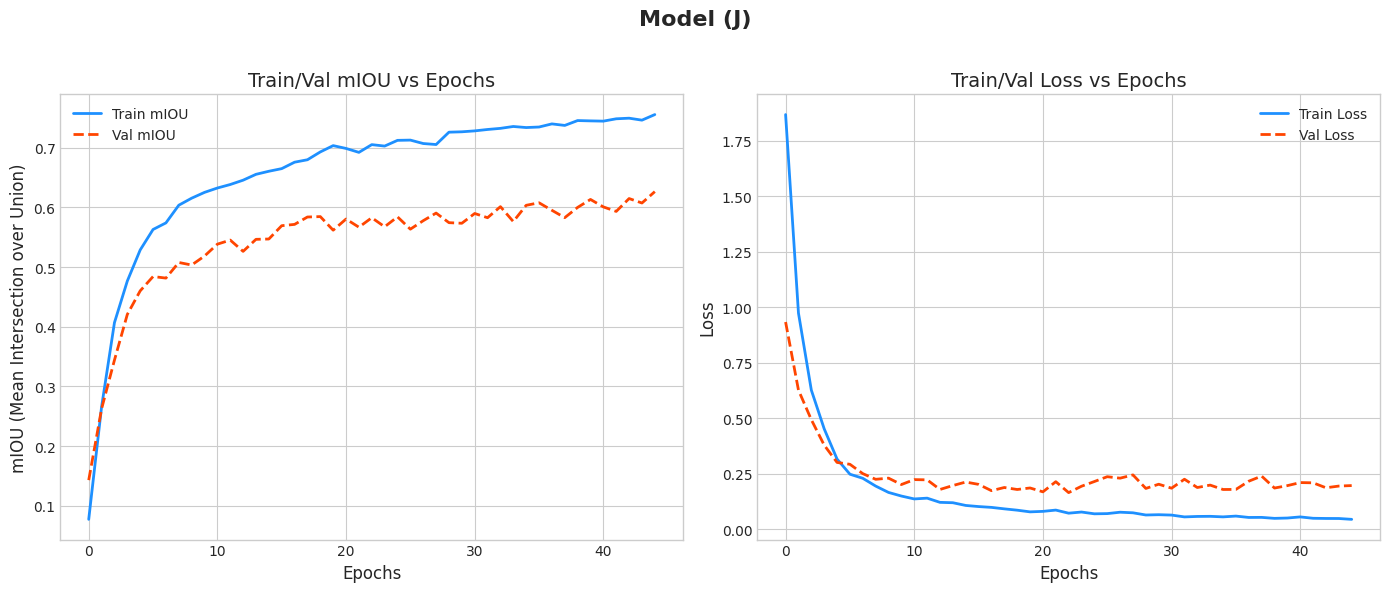

In [852]:
import matplotlib.pyplot as plt
import numpy as np # Assuming your metrics might be numpy arrays

max_epochs = 500
# --- Make sure train_metrics and val_metrics are defined before this ---
# For demonstration purposes, let's create some dummy data:
# Apply a style for prettier plots
plt.style.use('seaborn-v0_8-whitegrid') # A clean and popular style

# Define consistent colors
train_color = 'dodgerblue' # Color for all training lines
val_color = 'orangered'    # Color for all validation lines

# Create a figure with two subplots side by side
fig, axs = plt.subplots(1, 2, figsize=(14, 6)) # 1 row, 2 columns. Adjust figsize as needed.

# --- First Subplot: mIOU ---
axs[0].plot(train_metrics[0][:max_epochs], label='Train mIOU', color=train_color, linewidth=2)
axs[0].plot(val_metrics[0][:max_epochs], label='Val mIOU', color=val_color, linestyle='--', linewidth=2)
axs[0].set_title('Train/Val mIOU vs Epochs', fontsize=14)
axs[0].set_xlabel('Epochs', fontsize=12)
axs[0].set_ylabel('mIOU (Mean Intersection over Union)', fontsize=12)
axs[0].legend(fontsize=10)
axs[0].tick_params(axis='both', which='major', labelsize=10)

# --- Second Subplot: Loss ---
axs[1].plot(train_metrics[1][:max_epochs], label='Train Loss', color=train_color, linewidth=2) # Same color as train_mIOU
axs[1].plot(val_metrics[1][:max_epochs], label='Val Loss', color=val_color, linestyle='--', linewidth=2) # Same color as val_mIOU
axs[1].set_title('Train/Val Loss vs Epochs', fontsize=14)
axs[1].set_xlabel('Epochs', fontsize=12)
axs[1].set_ylabel('Loss', fontsize=12)
axs[1].legend(fontsize=10)
axs[1].tick_params(axis='both', which='major', labelsize=10)

# Add a main title to the figure
fig.suptitle('Model (J)', fontsize=16, fontweight='bold')

# Adjust layout to prevent overlapping titles/labels
plt.tight_layout(rect=[0, 0, 1, 0.96]) # rect leaves space for suptitle

# Show the plot
plt.show()

# To save the figure, you can use:
# fig.savefig('training_progress.png', dpi=300, bbox_inches='tight')
# fig.savefig('training_progress.pdf', bbox_inches='tight')

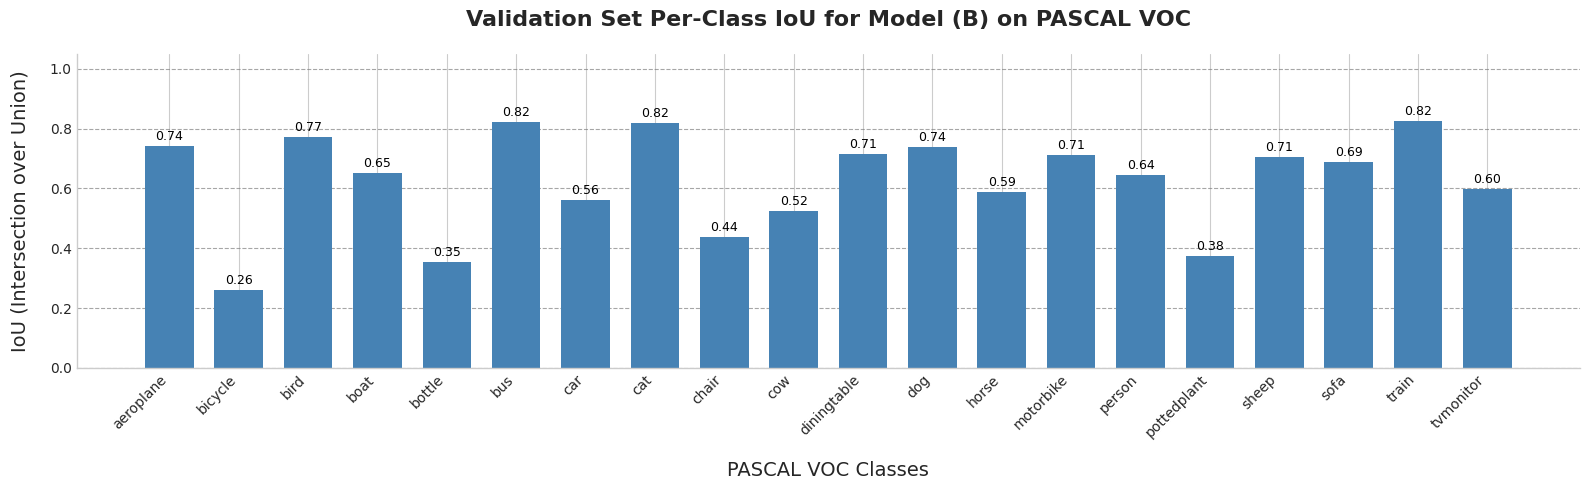

In [853]:
import matplotlib.pyplot as plt
import numpy as np

model_name = 'Model (B)'
# PASCAL VOC Class names (20 classes)
PASCAL_VOC_CLASSES = [
    'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]

# Apply a style
plt.style.use('seaborn-v0_8-whitegrid')

# Create the figure and axes
fig, ax = plt.subplots(figsize=(16, 5)) # Wider figure to accommodate class names

# Bar chart
bar_color = 'steelblue'
bars = ax.bar(PASCAL_VOC_CLASSES, val_metrics[2][idx], color=bar_color, width=0.7)

# Add labels and title
ax.set_xlabel('PASCAL VOC Classes', fontsize=14, labelpad=15)
ax.set_ylabel('IoU (Intersection over Union)', fontsize=14, labelpad=15)
# You can make the title more specific, e.g., if idx is a model name or number
ax.set_title(f'Validation Set Per-Class IoU for {model_name} on PASCAL VOC', fontsize=16, fontweight='bold', pad=20)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10) # ha='right' aligns the end of the label to the tick

# Add a horizontal grid (seaborn-whitegrid does this, but we can customize)
ax.yaxis.grid(True, linestyle='--', which='major', color='grey', alpha=0.7)
ax.set_axisbelow(True) # Send gridlines behind bars

# Optionally, add IoU values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval + 0.01, f'{yval:.2f}', # Format to 2 decimal places
             ha='center', va='bottom', fontsize=9, color='black')

# Set y-axis limits for better visualization (e.g., 0 to 1 for IoU)
ax.set_ylim(0, 1.05) # A bit above 1.0 to make space for text

# Remove top and right spines for a cleaner look (optional)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

# To save the figure:
# fig.savefig(f'per_class_iou_{model_name}.png', dpi=300)

In [841]:
## Load model
import json
import torch
import model_builder

config = json.load(open(os.path.join(LOG_FOLDER, 'config.json')))
model = model_builder.build(config['model_type'], 21).cuda()
model.load_state_dict(torch.load(os.path.join(LOG_FOLDER, 'model.pth')))

/tmp/ipykernel_15304/1066010615.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(os.path.join(LOG_FOLDER, 'model.pth')))


<All keys matched successfully>

In [843]:
import transforms
import dataset
import importlib
importlib.reload(transforms)
importlib.reload(dataset)
train_seg_dataset, val_seg_dataset, test_seg_dataset = dataset.get_voc_data(download=False, 
                                                                            add2012=config['add_2012'], 
                                                                            photometric_augs=config['photometric_augs'], 
                                                                            geometric_augs=True)

train_seg_dataset[i][1]

BitImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": false,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "BitImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 256
  }
}

BitImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": false,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "BitImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 256
  }
}



tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]]])

/tmp/ipykernel_15304/1312483230.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('viridis', len(class_names))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


BitImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": false,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": false,
  "image_mean": [
    0.485,
    0.456,
    0.406
  ],
  "image_processor_type": "BitImageProcessor",
  "image_std": [
    0.229,
    0.224,
    0.225
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 256
  }
}



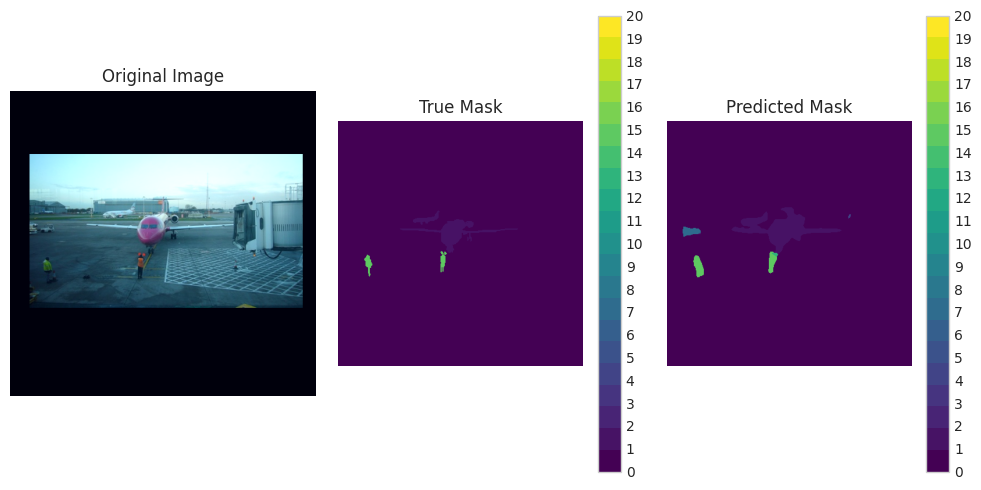

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1382136].


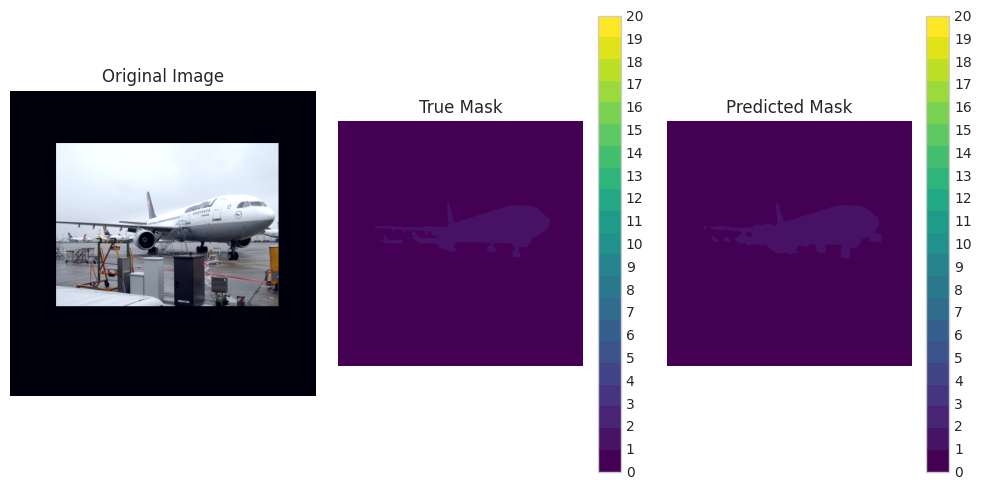

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.0902832].


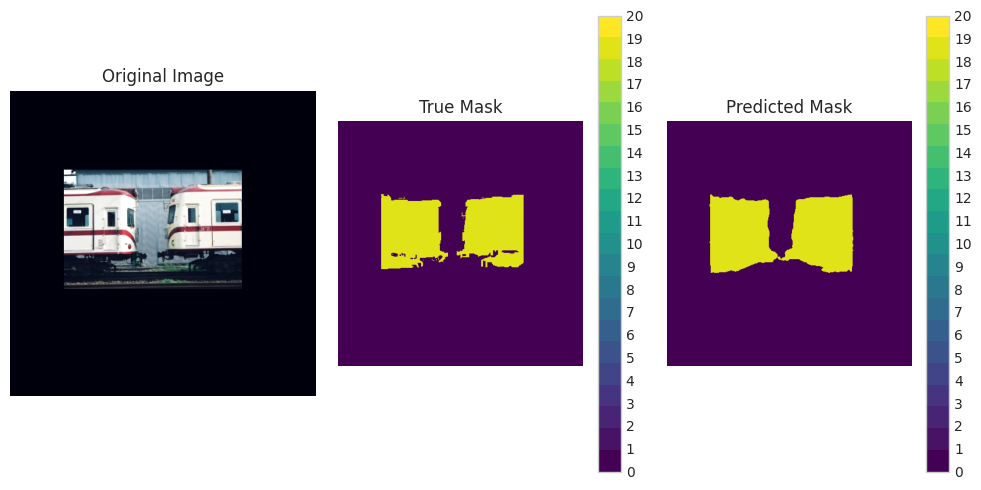

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.129499].


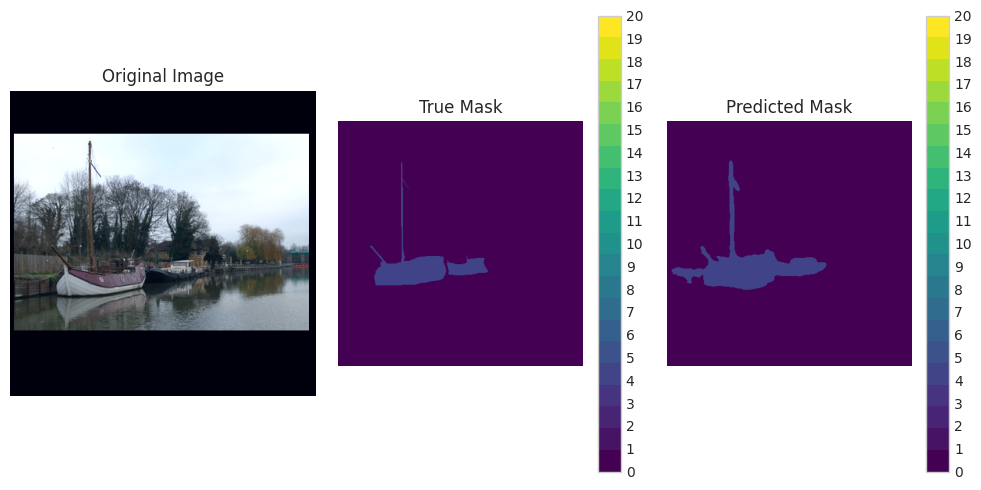

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


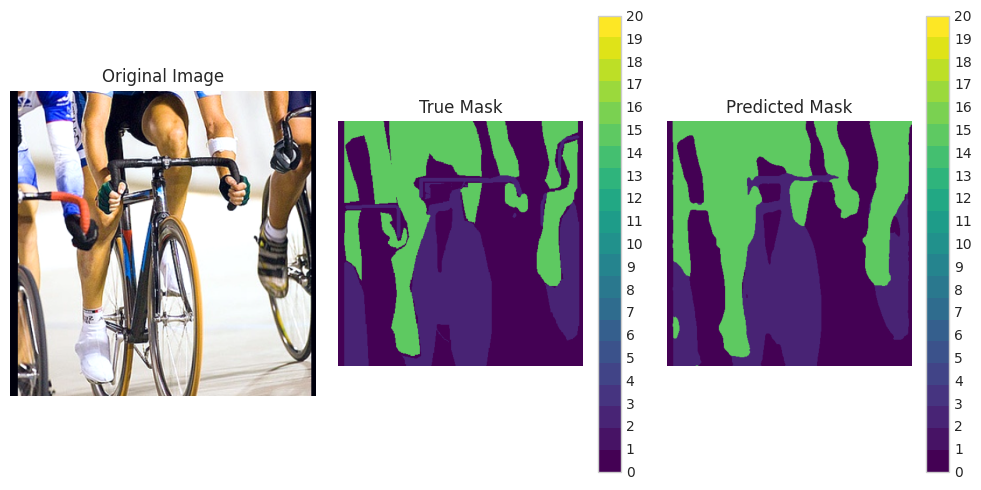

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


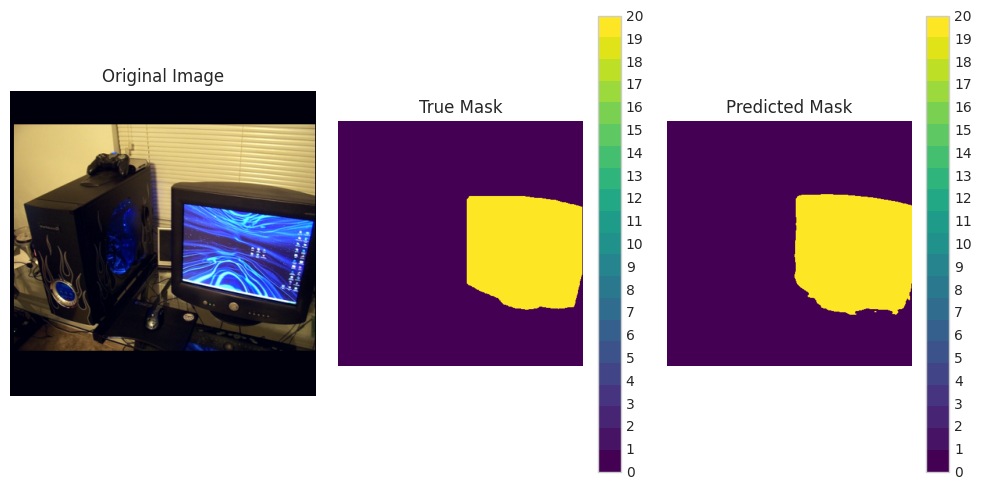

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.0989978].


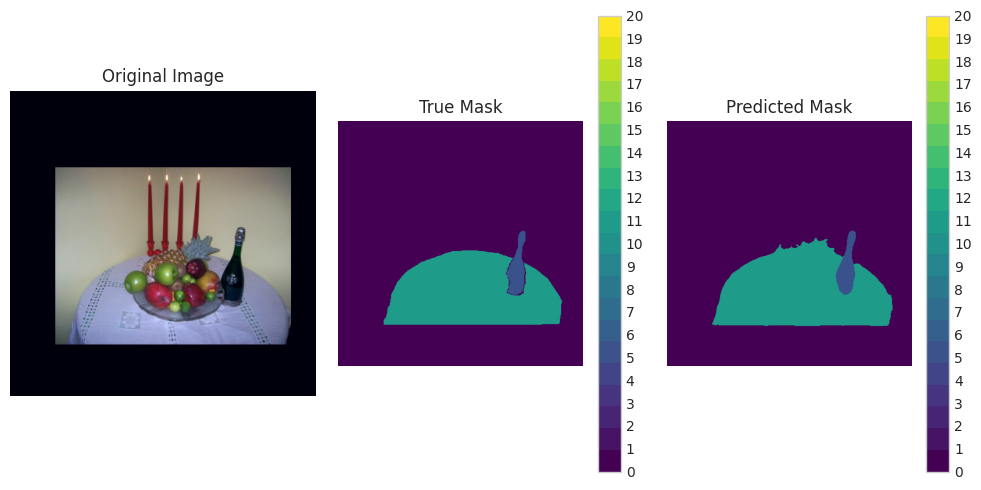

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


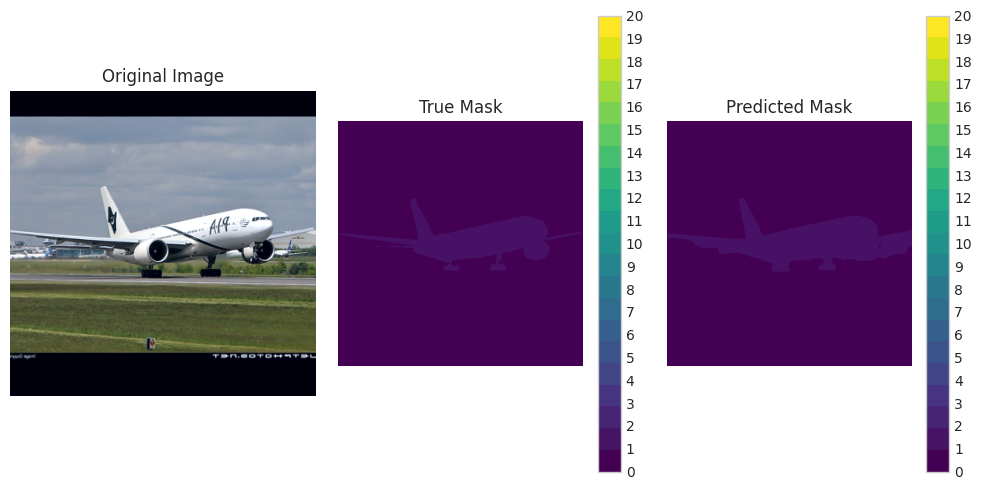

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


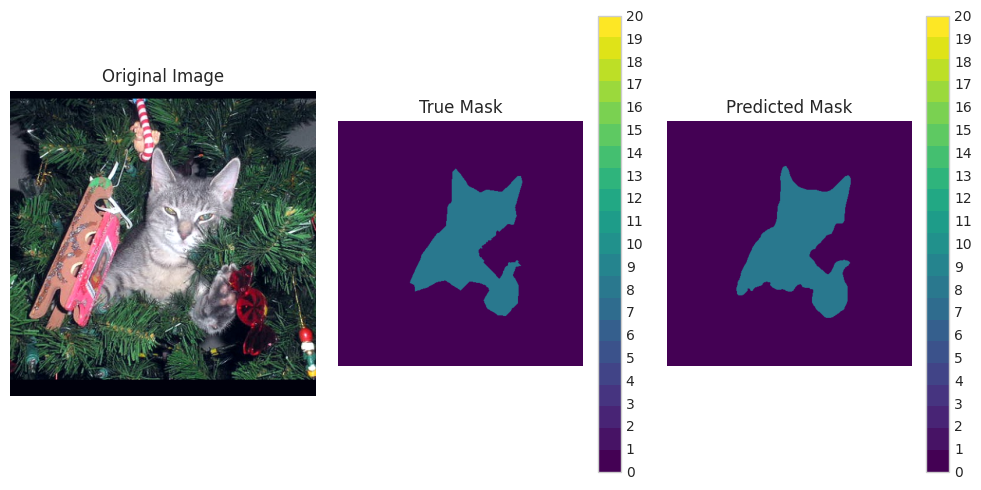

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1251416].


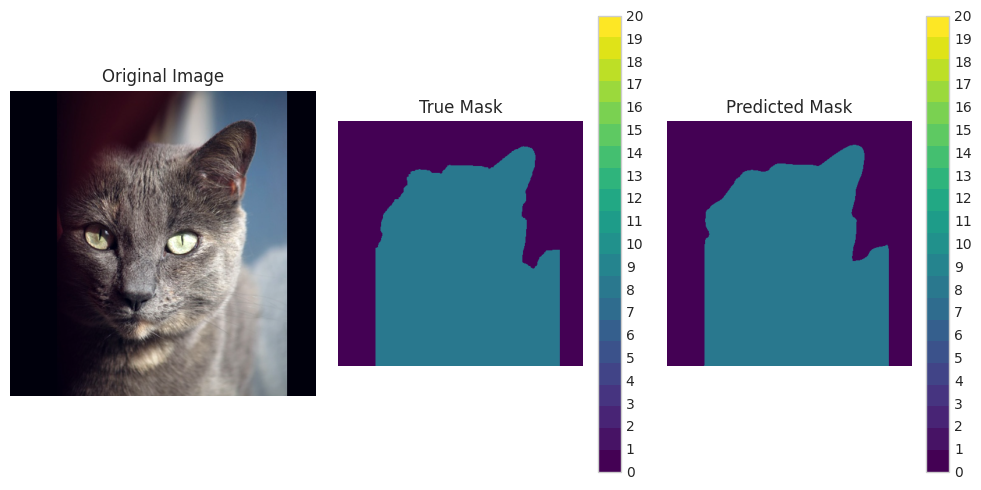

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


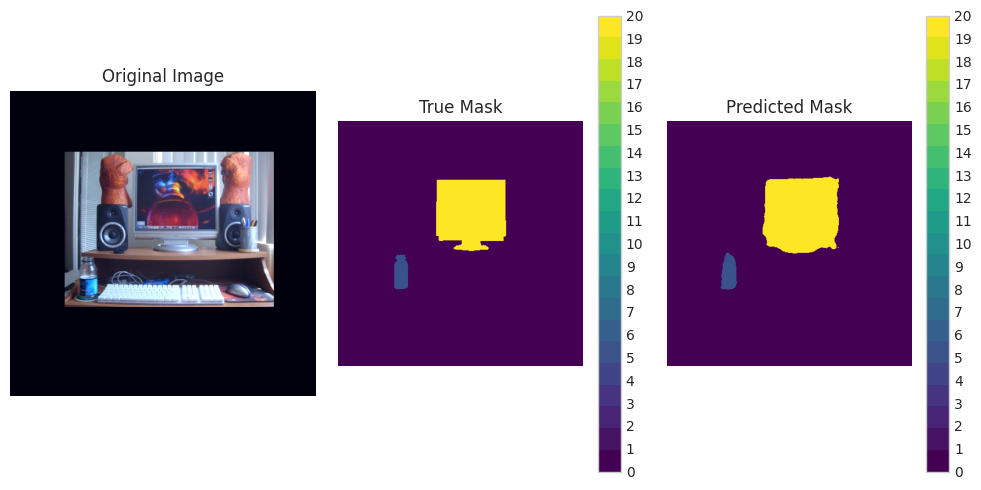

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.029475987..1.1600001].


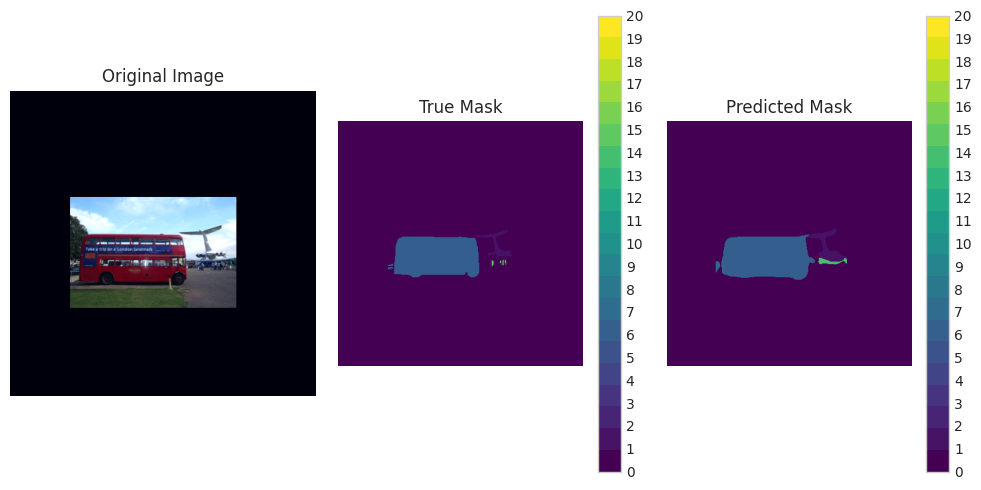

In [844]:
from dataset import *
trans = T.Compose([CT.Load(VOC_COLORMAP),
                T.RandomResize(128, 300), 
                T.RandomCrop(392), 
                CT.DinoPostProcess('facebook/dinov2-small')])

# Example of how to visualize a prediction
def visualize_prediction(model, trans, dataset, index, device, class_names):
    model.eval()
    image, mask = dataset[index]
    image_tensor = image.unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(image_tensor)
    predicted_mask = torch.argmax(output.squeeze(), dim=0).cpu().numpy()

    # Convert original mask to numpy for visualization
    true_mask = mask.squeeze().cpu().numpy()

    # Create a color map for the classes
    cmap = plt.cm.get_cmap('viridis', len(class_names))

    plt.figure(figsize=(10, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image.permute(1, 2, 0).cpu().numpy()*0.25 + 0.5)
    plt.title('Original Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(true_mask, cmap=cmap, vmin=0, vmax=len(class_names) - 1)
    plt.title('True Mask')
    plt.axis('off')
    plt.colorbar(ticks=np.arange(len(class_names)), format=plt.FuncFormatter(lambda val, loc: class_names[val]))

    plt.subplot(1, 3, 3)
    plt.imshow(predicted_mask, cmap=cmap, vmin=0, vmax=len(class_names) - 1)
    plt.title('Predicted Mask')
    plt.axis('off')
    plt.colorbar(ticks=np.arange(len(class_names)), format=plt.FuncFormatter(lambda val, loc: class_names[val]))

    plt.tight_layout()
    plt.show()

# Get class names from the dataset

# Visualize a prediction on the validation set
for i in range(12):
    visualize_prediction(model, trans, train_seg_dataset, i, 'cuda', range(21))

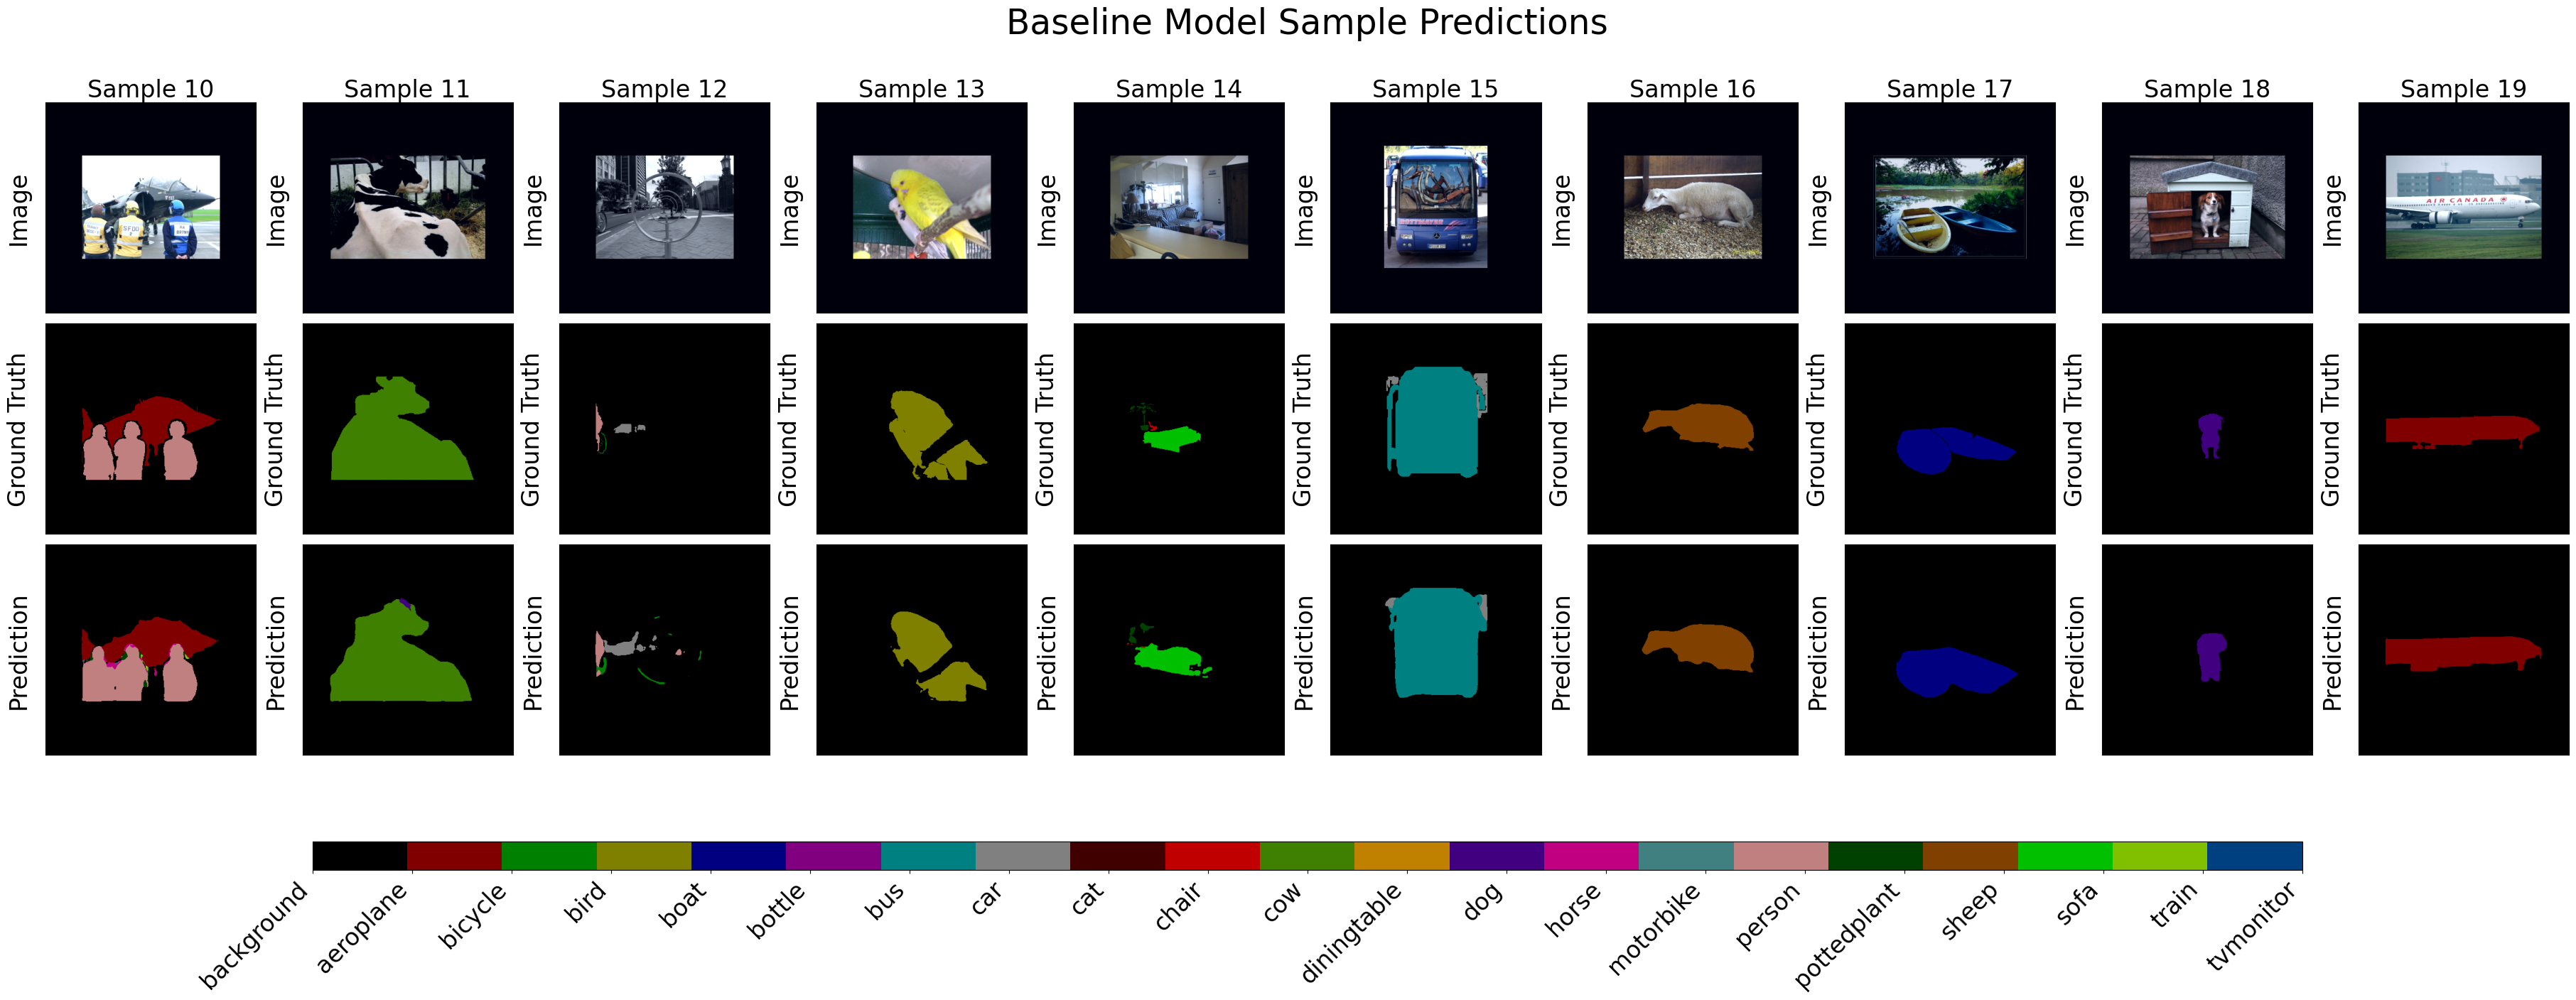

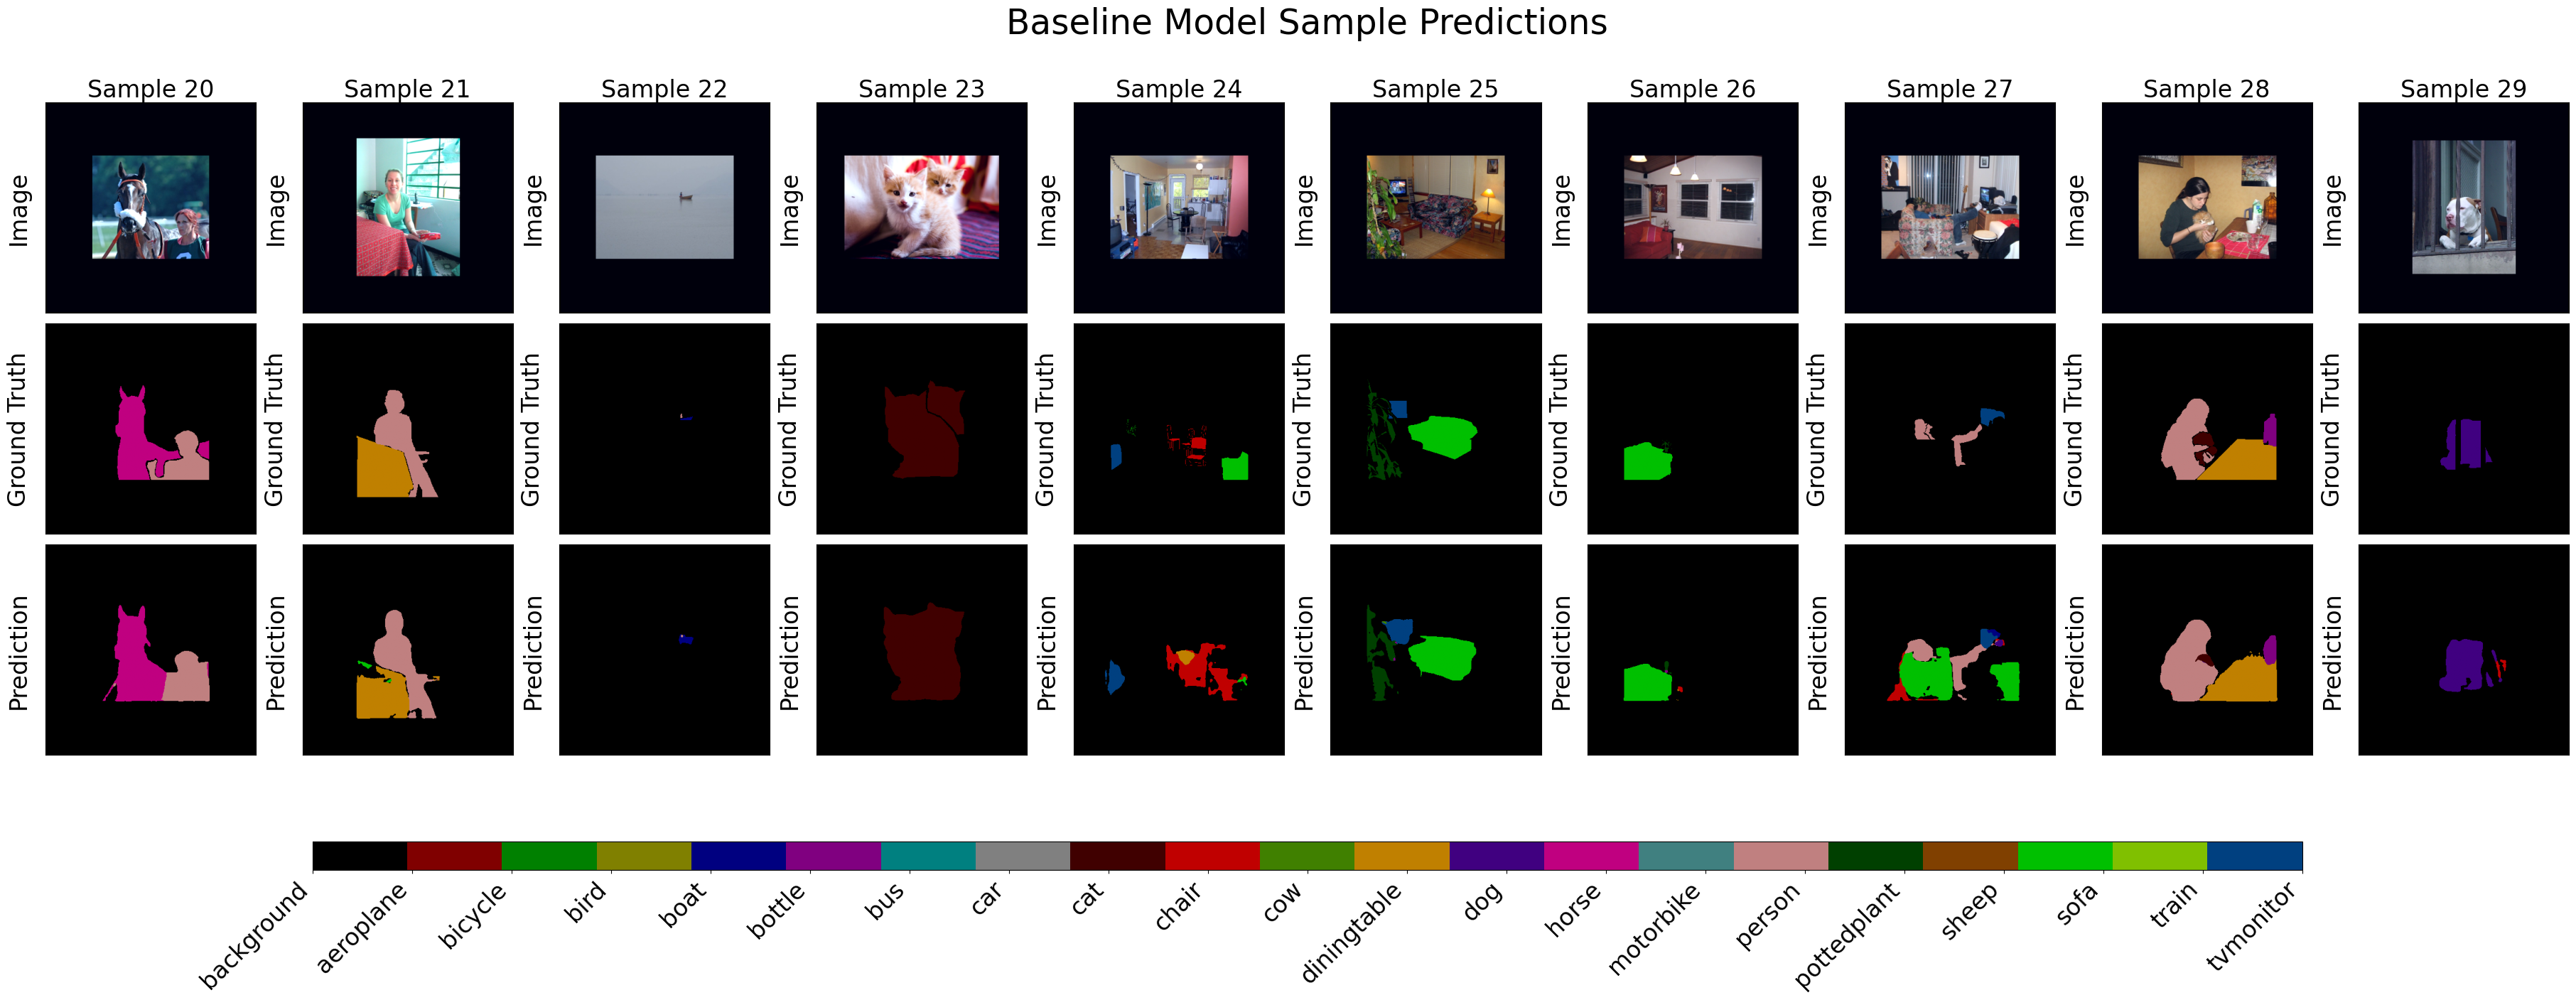

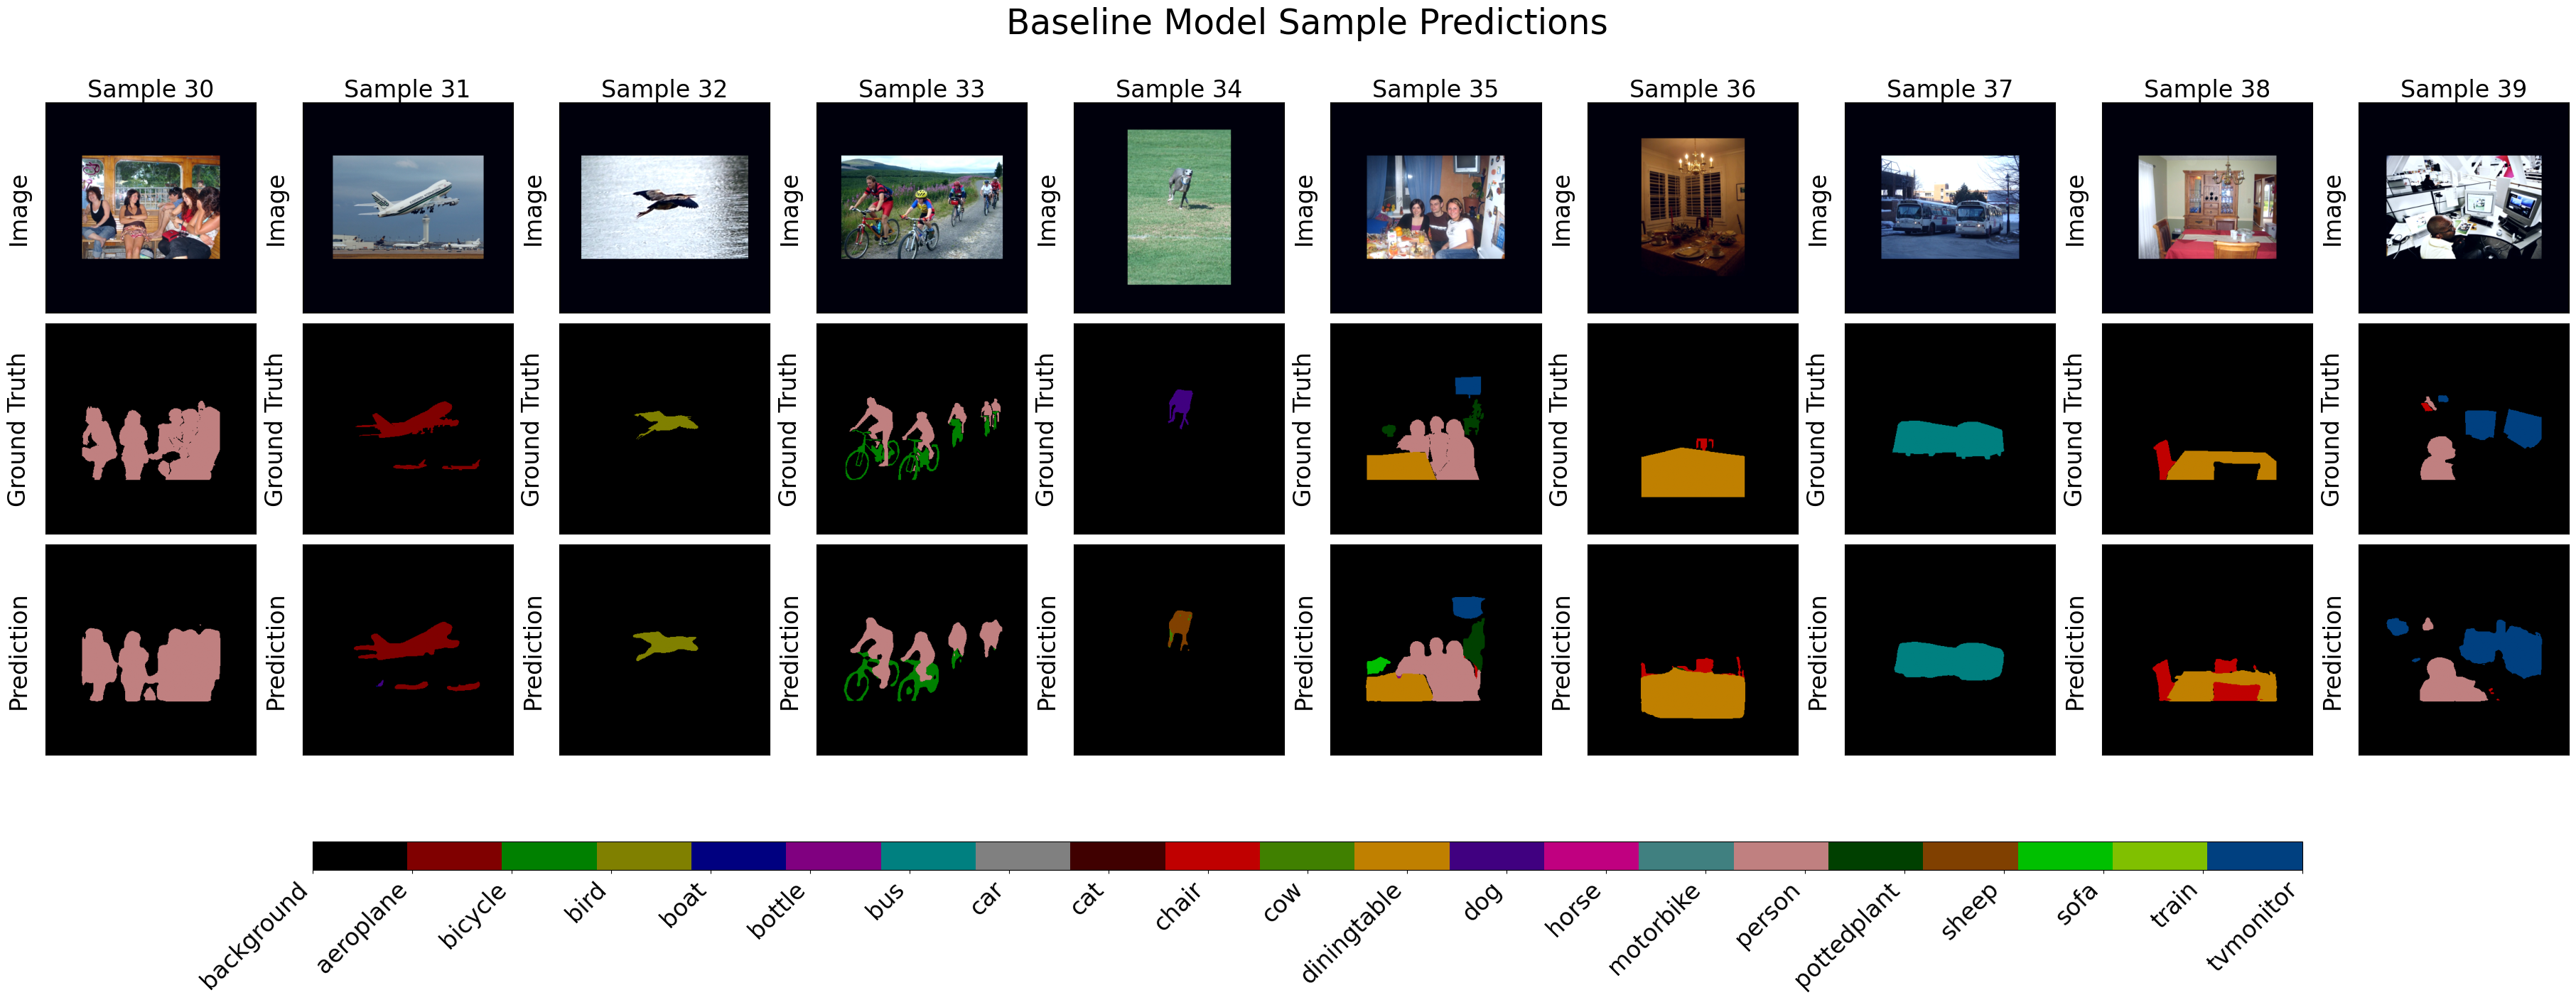

In [845]:
## import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Assuming your 'dataset' module and its components like 'CT' are imported correctly, for example:
# from dataset import *
# import path.to.your.CustomTransforms as CT # If CT is custom
# import torchvision.transforms as T # If T is for torchvision
plt.style.use('default')

# --- PASCAL VOC Colormap and Class Names ---
# IMPORTANT: If your `dataset` module (e.g., via CT.Load(VOC_COLORMAP))
# provides VOC_COLORMAP and class names, use those to ensure consistency.
# This is a standard PASCAL VOC colormap.
PASCAL_VOC_COLORMAP_RGB_255 = [
    (0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128),
    (128, 0, 128), (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0),
    (64, 128, 0), (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128),
    (192, 128, 128), (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0),
    (0, 64, 128)
]
# Normalize to [0,1] for Matplotlib
VOC_COLORMAP = [[r/255.0, g/255.0, b/255.0] for r,g,b in PASCAL_VOC_COLORMAP_RGB_255]

VOC_CLASS_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]
# --- End Colormap and Class Names ---


def visualize_predictions_grid(model, dataset, indices_to_show, device,
                               class_names, colormap_list):
    model.eval()
    num_examples = len(indices_to_show)
    if num_examples == 0:
        print("No indices provided to visualize.")
        return

    if len(colormap_list) < len(class_names):
        effective_colormap_list = colormap_list[:len(class_names)] if len(colormap_list) >= len(class_names) else None
        if effective_colormap_list is None:
             raise ValueError(f"Colormap has {len(colormap_list)} colors, but {len(class_names)} classes need colors.")
    else:
        effective_colormap_list = colormap_list[:len(class_names)]

    distinct_cmap = ListedColormap(effective_colormap_list)

    fig, axs = plt.subplots(3, num_examples, figsize=(num_examples * 4, 13.5))
    plt.suptitle("Baseline Model Sample Predictions", fontsize=35)

    if num_examples == 1:
        axs = np.array([axs[0], axs[1], axs[2]]).reshape(3,1)

    for i, data_idx in enumerate(indices_to_show):
        image_tensor, true_mask_tensor = dataset[data_idx]
        input_image_tensor = image_tensor.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_image_tensor)
        
        predicted_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy()
        true_mask = true_mask_tensor.squeeze().cpu().numpy()

        display_image = image_tensor.permute(1, 2, 0).cpu().numpy()
        display_image = display_image * 0.25 + 0.5
        display_image = np.clip(display_image, 0, 1)

        ax_img = axs[0, i]
        ax_img.imshow(display_image)
        ax_img.set_xticks([])
        ax_img.set_yticks([])
        ax_img.set_ylabel('Image', fontsize=24, labelpad=15) # Should appear on the left of this subplot
        ax_img.set_title(f'Sample {data_idx}', fontsize=24)

        ax_gt = axs[1, i]
        ax_gt.set_xticks([])
        ax_gt.set_yticks([])
        gt_map_img = ax_gt.imshow(true_mask, cmap=distinct_cmap, vmin=0, vmax=len(class_names) - 1)
        ax_gt.set_ylabel('Ground Truth', fontsize=24, labelpad=15) # Should appear on the left of this subplot

        ax_pred = axs[2, i]
        ax_pred.set_xticks([])
        ax_pred.set_yticks([])
        pred_map_img = ax_pred.imshow(predicted_mask, cmap=distinct_cmap, vmin=0, vmax=len(class_names) - 1)
        ax_pred.set_ylabel('Prediction', fontsize=24, labelpad=15) # Should appear on the left of this subplot

    # MODIFIED LAYOUT HANDLING:
    # Removed plt.tight_layout() for now to rely on explicit subplots_adjust.
    # Adjust subplot parameters to make space, especially on the left for y-labels
    # and bottom for the colorbar.
    fig.subplots_adjust(
        left=0.05,    # Increased left margin (default is ~0.125). Try 0.2 if 0.15 is not enough.
        right=0.95,   # Adjusted right margin.
        bottom=0.2,  # For colorbar with large font.
        top=0.88,     # Adjusted top margin slightly for titles.
        hspace=0.05,  # Vertical space between rows of subplots.
        wspace=0.05    # Horizontal space between columns of subplots.
    )

    if num_examples > 0:
        try:
            mappable_for_colorbar = gt_map_img if 'gt_map_img' in locals() else pred_map_img
            cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.03])
            cbar = fig.colorbar(mappable_for_colorbar, cax=cbar_ax, orientation='horizontal',
                                ticks=np.arange(len(class_names)))
            if len(class_names) > 0:
                 cbar.ax.set_xticklabels(
                     [class_names[idx] if idx < len(class_names) else "" for idx in range(len(class_names))],
                     rotation=45, ha='right', fontsize=24)
            else:
                 cbar.ax.set_xticklabels([])
        except Exception as e:
            print(f"Could not create colorbar: {e}")
            
    plt.show()

# --- How to call the new function ---
# This replaces your old loop:
# for i in range(12):
#     visualize_prediction(model, trans, val_seg_dataset, i, 'cuda', range(21))

# Example: Visualize the first 5 predictions from val_seg_dataset
# Ensure 'model', 'val_seg_dataset', and 'device' (e.g., 'cuda') are defined in your script.

num_predictions_to_show = 5
if len(val_seg_dataset) < num_predictions_to_show:
    print(f"Dataset has only {len(val_seg_dataset)} samples. Visualizing all.")
    indices_to_visualize = list(range(len(val_seg_dataset)))
else:
    indices_to_visualize = list(range(num_predictions_to_show))

if indices_to_visualize: # Check if there's anything to show
    visualize_predictions_grid(model,          # Your trained model
                               val_seg_dataset,# Your validation dataset instance
                               range(10, 20),
                               'cuda',         # Or your specific device
                               VOC_CLASS_NAMES,# Defined list of class names
                               VOC_COLORMAP)   # Defined list of normalized RGB colors
    visualize_predictions_grid(model,          # Your trained model
                               val_seg_dataset,# Your validation dataset instance
                               range(20, 30),
                               'cuda',         # Or your specific device
                               VOC_CLASS_NAMES,# Defined list of class names
                               VOC_COLORMAP)   # Defined list of normalized RGB colors
    visualize_predictions_grid(model,          # Your trained model
                               val_seg_dataset,# Your validation dataset instance
                               range(30, 40),
                               'cuda',         # Or your specific device
                               VOC_CLASS_NAMES,# Defined list of class names
                               VOC_COLORMAP) 
else:
    print("No samples to visualize.")

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Assuming your 'dataset' module and its components like 'CT' are imported correctly, for example:
# from dataset import *
# import path.to.your.CustomTransforms as CT # If CT is custom
# import torchvision.transforms as T # If T is for torchvision
plt.style.use('default')

# --- PASCAL VOC Colormap and Class Names ---
# IMPORTANT: If your `dataset` module (e.g., via CT.Load(VOC_COLORMAP))
# provides VOC_COLORMAP and class names, use those to ensure consistency.
# This is a standard PASCAL VOC colormap.
PASCAL_VOC_COLORMAP_RGB_255 = [
    (0, 0, 0), (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128),
    (128, 0, 128), (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0),
    (64, 128, 0), (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128),
    (192, 128, 128), (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0),
    (0, 64, 128)
]
# Normalize to [0,1] for Matplotlib
VOC_COLORMAP = [[r/255.0, g/255.0, b/255.0] for r,g,b in PASCAL_VOC_COLORMAP_RGB_255]

VOC_CLASS_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus', 'car', 'cat',
    'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike', 'person',
    'pottedplant', 'sheep', 'sofa', 'train', 'tvmonitor'
]
# --- End Colormap and Class Names ---


def visualize_predictions_grid(model, dataset, indices_to_show, device,
                               class_names, colormap_list):
    model.eval()
    num_examples = len(indices_to_show)
    if num_examples == 0:
        print("No indices provided to visualize.")
        return

    if len(colormap_list) < len(class_names):
        effective_colormap_list = colormap_list[:len(class_names)] if len(colormap_list) >= len(class_names) else None
        if effective_colormap_list is None:
             raise ValueError(f"Colormap has {len(colormap_list)} colors, but {len(class_names)} classes need colors.")
    else:
        effective_colormap_list = colormap_list[:len(class_names)]

    distinct_cmap = ListedColormap(effective_colormap_list)

    fig, axs = plt.subplots(3, num_examples, figsize=(num_examples * 4, 13.5))
    plt.suptitle("Baseline Model Sample Predictions", fontsize=35)

    if num_examples == 1:
        axs = np.array([axs[0], axs[1], axs[2]]).reshape(3,1)

    for i, data_idx in enumerate(indices_to_show):
        image_tensor, true_mask_tensor = dataset[data_idx]
        input_image_tensor = image_tensor.unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_image_tensor)
        
        predicted_mask = torch.argmax(output.squeeze(0), dim=0).cpu().numpy()
        true_mask = true_mask_tensor.squeeze().cpu().numpy()

        display_image = image_tensor.permute(1, 2, 0).cpu().numpy()
        display_image = display_image * 0.25 + 0.5
        display_image = np.clip(display_image, 0, 1)

        ax_img = axs[0, i]
        ax_img.imshow(display_image)
        ax_img.set_xticks([])
        ax_img.set_yticks([])
        ax_img.set_ylabel('Image', fontsize=24, labelpad=15) # Should appear on the left of this subplot
        ax_img.set_title(f'Sample {data_idx}', fontsize=24)

        ax_gt = axs[1, i]
        ax_gt.set_xticks([])
        ax_gt.set_yticks([])
        gt_map_img = ax_gt.imshow(true_mask, cmap=distinct_cmap, vmin=0, vmax=len(class_names) - 1)
        ax_gt.set_ylabel('Ground Truth', fontsize=24, labelpad=15) # Should appear on the left of this subplot

        ax_pred = axs[2, i]
        ax_pred.set_xticks([])
        ax_pred.set_yticks([])
        pred_map_img = ax_pred.imshow(predicted_mask, cmap=distinct_cmap, vmin=0, vmax=len(class_names) - 1)
        ax_pred.set_ylabel('Prediction', fontsize=24, labelpad=15) # Should appear on the left of this subplot

    # MODIFIED LAYOUT HANDLING:
    # Removed plt.tight_layout() for now to rely on explicit subplots_adjust.
    # Adjust subplot parameters to make space, especially on the left for y-labels
    # and bottom for the colorbar.
    fig.subplots_adjust(
        left=0.05,    # Increased left margin (default is ~0.125). Try 0.2 if 0.15 is not enough.
        right=0.95,   # Adjusted right margin.
        bottom=0.2,  # For colorbar with large font.
        top=0.88,     # Adjusted top margin slightly for titles.
        hspace=0.05,  # Vertical space between rows of subplots.
        wspace=0.05    # Horizontal space between columns of subplots.
    )

    if num_examples > 0:
        try:
            mappable_for_colorbar = gt_map_img if 'gt_map_img' in locals() else pred_map_img
            cbar_ax = fig.add_axes([0.15, 0.08, 0.7, 0.03])
            cbar = fig.colorbar(mappable_for_colorbar, cax=cbar_ax, orientation='horizontal',
                                ticks=np.arange(len(class_names)))
            if len(class_names) > 0:
                 cbar.ax.set_xticklabels(
                     [class_names[idx] if idx < len(class_names) else "" for idx in range(len(class_names))],
                     rotation=45, ha='right', fontsize=24)
            else:
                 cbar.ax.set_xticklabels([])
        except Exception as e:
            print(f"Could not create colorbar: {e}")
            
    plt.show()

# --- How to call the new function ---
# This replaces your old loop:
# for i in range(12):
#     visualize_prediction(model, trans, val_seg_dataset, i, 'cuda', range(21))

# Example: Visualize the first 5 predictions from val_seg_dataset
# Ensure 'model', 'val_seg_dataset', and 'device' (e.g., 'cuda') are defined in your script.

num_predictions_to_show = 5
if len(val_seg_dataset) < num_predictions_to_show:
    print(f"Dataset has only {len(val_seg_dataset)} samples. Visualizing all.")
    indices_to_visualize = list(range(len(val_seg_dataset)))
else:
    indices_to_visualize = list(range(num_predictions_to_show))

if indices_to_visualize: # Check if there's anything to show
    visualize_predictions_grid(model,          # Your trained model
                               val_seg_dataset,# Your validation dataset instance
                               range(10, 20),
                               'cuda',         # Or your specific device
                               VOC_CLASS_NAMES,# Defined list of class names
                               VOC_COLORMAP)   # Defined list of normalized RGB colors
    visualize_predictions_grid(model,          # Your trained model
                               val_seg_dataset,# Your validation dataset instance
                               range(20, 30),
                               'cuda',         # Or your specific device
                               VOC_CLASS_NAMES,# Defined list of class names
                               VOC_COLORMAP)   # Defined list of normalized RGB colors
    visualize_predictions_grid(model,          # Your trained model
                               val_seg_dataset,# Your validation dataset instance
                               range(30, 40),
                               'cuda',         # Or your specific device
                               VOC_CLASS_NAMES,# Defined list of class names
                               VOC_COLORMAP)   # Defined list of normalized RGB colors
else:
    print("No samples to visualize.")

In [108]:
from collections import defaultdict
class_scores = np.zeros(21)
total_scores = 0
for i in range(len(train_seg_dataset)):
    a, b = np.unique(train_seg_dataset[i][1].cpu().numpy(), return_counts=True)
    total_scores += b.sum()
    for idx in range(len(a)):
        class_scores[a[idx]] += b[idx]
class_weights = (1/(class_scores/np.sum(class_scores))/100).tolist()